<h3>Importation des bibliothèques nécessaires</h3>

In [1]:
import pandas as pd
import numpy as np

import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

from collections import Counter
import joblib

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Bidirectional, Embedding, LSTM, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model


2024-03-02 17:42:44.575519: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-02 17:42:44.689646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 17:42:44.689712: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 17:42:44.689769: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 17:42:44.707029: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-02 17:42:44.708147: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

<h3>Chargement des données & Tokenisation des phrases</h3>

Le fichier csv se divise en deux:
<li>df_td : Tso-drafitra</li>
<li>df_md : Mivadi-drafitra</li>

In [2]:
start = time.time()

<h4>Tso-drafitra</h4>

In [3]:
stopwords_file_path_td = '/home/vatosoa/mg-smart-lingua-discover/data/corpus/stopwords-td.txt'
with open(stopwords_file_path_td,'r', encoding='utf-8') as file:
    stop_words_td = set(file.read().splitlines())

file_path_td = '/home/vatosoa/mg-smart-lingua-discover/data/corpus/firafitra-td.csv'
df_td = pd.read_csv(file_path_td)

# Colonnes 'Fehezanteny' et 'Sokajinteny' sont remplies ?
df_td['Fehezanteny'].fillna('', inplace=True)
df_td['Firafitra'].fillna('', inplace=True)

# Fonction de tokenisation de mots
def tokenize_words_td(text):
    if isinstance(text, str):
        text = re.sub(r'[-;:()?!,.\'"\/|]', ' ', text)
        tokens = nltk.word_tokenize(text)
        #tokens = [token.lower() for token in tokens if token.isalnum()]
        tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words_td]

        return tokens
    else:
        return []

# Appliquer la tokenisation aux phrases et créer une colonne pour les tokens
df_td['Fehezanteny_tokens'] = df_td['Fehezanteny'].apply(tokenize_words_td)

# Associer chaque token à son étiquette correspondante
df_td['Firafitra_tokens'] = df_td['Firafitra'].apply(lambda x: x.split())

In [4]:
print(df_td)

                                          Fehezanteny  \
0   "Tamin'ny voalohany Andriamanitra nahary ny la...   
1   "Ary ny fanahin'Andriamanitra nanomba tambonin...   
2   "Ary Andriamanitra nanao hoe: Misia mazava; di...   
3   "Ary hitan'Andriamanitra fa tsara ny mazava; a...   
4   "Ary Andriamanitra nanao ny mazava hoe andro; ...   
5   "Dia nisy hariva, ary nisy maraina, andro voal...   
6   "Ary Andriamanitra nanao hoe: Misia habakabaka...   
7   "Ary Andriamanitra nanao ny habakabakaka ka na...   
8   "Ary Andriamanitra nanao ny habakabaka hoe lan...   
9   "Dia nisy hariva, ary nisy maraina, andro faha...   
10  "Ary Andriamanitra nanao hoe : Aoka hiangona n...   
11  "Ary Andriamanitra nanao ny maina hoe tany; ar...   
12          "Ary hitan'Andriamanitra fa tsara izany."   
13  "Ary Andriamanitra nanao hoe: Aoka ny tany han...   
14  "Ary ny tany naniry ahitra sy anana mamoa samy...   
15  "Dia nisy hariva, ary nisy maraina, andro faha...   
16  "Ary Andriamanitra nanao ho

<h4>Mivadi-drafitra</h4>

In [5]:
stopwords_file_path_md = '/home/vatosoa/mg-smart-lingua-discover/data/corpus/stopwords-md.txt'
with open(stopwords_file_path_md,'r', encoding='utf-8') as file:
    stop_words_md = set(file.read().splitlines())

file_path_md = '/home/vatosoa/mg-smart-lingua-discover/data/corpus/firafitra-md.csv'
df_md = pd.read_csv(file_path_md)

# Colonnes 'Fehezanteny' et 'Sokajinteny' sont remplies ?
df_md['Fehezanteny'].fillna('', inplace=True)
df_md['Firafitra'].fillna('', inplace=True)

# Fonction de tokenisation de mots
def tokenize_words_md(text):
    if isinstance(text, str):
        text = re.sub(r'[-;:()?!,.\'"\/|]', ' ', text)
        tokens = nltk.word_tokenize(text)
        #tokens = [token.lower() for token in tokens if token.isalnum()]
        tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words_md]

        return tokens
    else:
        return []

# Appliquer la tokenisation aux phrases et créer une colonne pour les tokens
df_md['Fehezanteny_tokens'] = df_md['Fehezanteny'].apply(tokenize_words_md)

# Associer chaque token à son étiquette correspondante
df_md['Firafitra_tokens'] = df_md['Firafitra'].apply(lambda x: x.split())

In [6]:
print(df_md)

                                         Fehezanteny  \
0  "Tamin'ny voalohany Andriamanitra dia nahary n...   
1  "Ary ny tany dia tsy nisy endrika sady foana; ...   
2  "Ary ny fanahin'Andriamanitra dia nanomba tamb...   
3  "Ary Andriamanitra nanao hoe: Misia mazava; ma...   
4  "Ary Andriamanitra dia nahita fa tsara ny maza...   
5  "Ary ny mazava dia nataon'Andriamanitra hoe an...   
6  "Ary Andriamanitra dia nanao ny habakabakaka k...   
7  "Ary Andriamanitra dia nanao ny habakabaka hoe...   
8            "Izy dia hitan'Andriamanitra fa tsara."   

                       Firafitra  \
0              L Kianteny EM F F   
1      L Kianteny EM EM F F L EM   
2              L L Kianteny EM F   
3        L EM EM L L Kianteny EM   
4    L Kianteny EM EM L L EM F F   
5       L Kianteny EM F F L EM F   
6  L Kianteny EM F EM L F F F EM   
7              L Kianteny EM F F   
8                L Kianteny EM F   

                                  Fehezanteny_tokens  \
0        [andriamanitr

<h3>Préparation des données d'entrainement et de test</h3>

<h4>Tso-drafitra</h4>

In [7]:
# Étape 1 : Création des jeux de données d'entraînement et de test pour Tso-drafitra
X_td = df_td['Fehezanteny_tokens'].values
y_td = df_td['Firafitra_tokens'].values

X_td_train, X_td_test, y_td_train, y_td_test = train_test_split(X_td, y_td, test_size=0.2, random_state=42)


<h4>Mivadi-drafitra</h4>

In [8]:
# Étape 1 : Création des jeux de données d'entraînement et de test pour Mivadi-drafitra
X_md = df_md['Fehezanteny_tokens'].values
y_md = df_md['Firafitra_tokens'].values

X_md_train, X_md_test, y_md_train, y_md_test = train_test_split(X_md, y_md, test_size=0.2, random_state=42)


<h3>Encodage des tokens et des étiquettes</h3>

<h4>Tso-drafitra</h4>

In [9]:
# Étape 2-3 : Encodage des tokens et des étiquettes "Tso-drafitra"
token_encoder_td = LabelEncoder()
label_encoder_td = LabelEncoder()

# Adapter les encodeurs aux données d'entraînement pour les tokens et les étiquettes
token_encoder_td.fit(df_td['Fehezanteny_tokens'].explode())
label_encoder_td.fit(df_td['Firafitra_tokens'].explode())

# Fonction pour encoder une séquence de tokens
def encode_sequence_td(seq, encoder):
    return [encoder.transform([token])[0] for token in seq]

# Encodage des séquences de tokens
X_td_train_encoded = [encode_sequence_td(seq, token_encoder_td) for seq in X_td_train]
X_td_test_encoded = [encode_sequence_td(seq, token_encoder_td) for seq in X_td_test]

# Trouver la longueur maximale de séquence après l'encodage
max_sequence_length_td = max(len(seq) for seq in X_td_train_encoded + X_td_test_encoded)

# Remplissage des séquences
X_td_train_padded = pad_sequences(X_td_train_encoded, maxlen=max_sequence_length_td, padding='post')
X_td_test_padded = pad_sequences(X_td_test_encoded, maxlen=max_sequence_length_td, padding='post')

# Encodage des étiquettes
y_td_train_encoded = [encode_sequence_td(seq, label_encoder_td) for seq in y_td_train]
y_td_test_encoded = [encode_sequence_td(seq, label_encoder_td) for seq in y_td_test]

# Remplissage des étiquettes
y_td_train_padded = pad_sequences(y_td_train_encoded, maxlen=max_sequence_length_td, padding='post')
y_td_test_padded = pad_sequences(y_td_test_encoded, maxlen=max_sequence_length_td, padding='post')


<h4>Mivadi-drafitra</h4>

In [10]:
# Étape 2-3 : Encodage des tokens et des étiquettes "Mivadi-drafitra"
token_encoder_md = LabelEncoder()
label_encoder_md = LabelEncoder()

# Adapter les encodeurs aux données d'entraînement pour les tokens et les étiquettes
token_encoder_md.fit(df_md['Fehezanteny_tokens'].explode())
label_encoder_md.fit(df_md['Firafitra_tokens'].explode())

# Fonction pour encoder une séquence de tokens
def encode_sequence_md(seq, encoder):
    return [encoder.transform([token])[0] for token in seq]

# Encodage des séquences de tokens
X_md_train_encoded = [encode_sequence_md(seq, token_encoder_md) for seq in X_md_train]
X_md_test_encoded = [encode_sequence_md(seq, token_encoder_md) for seq in X_md_test]

# Trouver la longueur maximale de séquence après l'encodage
max_sequence_length_md = max(len(seq) for seq in X_md_train_encoded + X_md_test_encoded)

# Remplissage des séquences
X_md_train_padded = pad_sequences(X_md_train_encoded, maxlen=max_sequence_length_md, padding='post')
X_md_test_padded = pad_sequences(X_md_test_encoded, maxlen=max_sequence_length_md, padding='post')

# Encodage des étiquettes
y_md_train_encoded = [encode_sequence_md(seq, label_encoder_md) for seq in y_md_train]
y_md_test_encoded = [encode_sequence_md(seq, label_encoder_md) for seq in y_md_test]

# Remplissage des étiquettes
y_md_train_padded = pad_sequences(y_md_train_encoded, maxlen=max_sequence_length_md, padding='post')
y_md_test_padded = pad_sequences(y_md_test_encoded, maxlen=max_sequence_length_md, padding='post')


<h3>Calcul des poids de classe inverses</h3>

<h4>Tso-drafitra</h4>

In [11]:
# Compter la fréquence des étiquettes dans les données d'entraînement
label_freq_td = Counter(y_td_train_padded.flatten())

# Calculer les poids de classe inverses en fonction de la fréquence
total_samples_td = len(y_td_train_padded.flatten())
class_weights_td = {cls: total_samples_td / label_freq_td[cls] for cls in label_freq_td}


<h4>Mivadi-drafitra</h4>

In [12]:
# Compter la fréquence des étiquettes dans les données d'entraînement
label_freq_md = Counter(y_md_train_padded.flatten())

# Calculer les poids de classe inverses en fonction de la fréquence
total_samples_md = len(y_md_train_padded.flatten())
class_weights_md = {cls: total_samples_md / label_freq_md[cls] for cls in label_freq_md}


<h3>Création du modèle LSTM</h3>

<h4>Tso-drafitra</h4>

In [13]:
# Création du modèle LSTM
model_td = Sequential()
model_td.add(Embedding(input_dim=len(token_encoder_td.classes_), output_dim=64, input_length=max_sequence_length_td))
model_td.add(Bidirectional(LSTM(128, return_sequences=True))) # Retourne les séquences pour chaque token
model_td.add(Dense(len(label_encoder_td.classes_), activation='softmax')) # Couche Dense pour chaque token

# Compilation du modèle en utilisant sample_weight_mode
model_td.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'], sample_weight_mode=class_weights_td)


<h4>Mivadi-drafitra</h4>

In [14]:
# Création du modèle LSTM
model_md = Sequential()
model_md.add(Embedding(input_dim=len(token_encoder_md.classes_), output_dim=64, input_length=max_sequence_length_md))
model_md.add(Bidirectional(LSTM(128, return_sequences=True))) # Retourne les séquences pour chaque token
model_md.add(Dense(len(label_encoder_md.classes_), activation='softmax')) # Couche Dense pour chaque token

# Compilation du modèle en utilisant sample_weight_mode
model_md.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'], sample_weight_mode=class_weights_md)


<h3>Entraînement du modèle</h3>

<h4>Tso-drafitra</h4>

In [15]:
# Entraînement du modèle en utilisant les données d'entraînement et de validation "Tso-drafitra"
# Récupérer l'historique de l'entraînement "Tso-drafitra"
history_td = model_td.fit(X_td_train_padded, y_td_train_padded, epochs=50, batch_size=32, validation_data=(X_td_test_padded, y_td_test_padded))


Epoch 1/50
2/2 [==============================] - 15s 4s/step - loss: 1.0958 - accuracy: 0.1886 - val_loss: 0.9992 - val_accuracy: 0.8523
Epoch 2/50
2/2 [==============================] - 0s 255ms/step - loss: 0.9893 - accuracy: 0.8520 - val_loss: 0.8851 - val_accuracy: 0.8523
Epoch 3/50
2/2 [==============================] - 1s 249ms/step - loss: 0.8721 - accuracy: 0.8520 - val_loss: 0.7291 - val_accuracy: 0.8523
Epoch 4/50
2/2 [==============================] - 1s 379ms/step - loss: 0.7097 - accuracy: 0.8520 - val_loss: 0.5112 - val_accuracy: 0.8523
Epoch 5/50
2/2 [==============================] - 1s 450ms/step - loss: 0.5010 - accuracy: 0.8520 - val_loss: 0.4046 - val_accuracy: 0.8523
Epoch 6/50
2/2 [==============================] - 1s 264ms/step - loss: 0.4189 - accuracy: 0.8520 - val_loss: 0.3804 - val_accuracy: 0.8523
Epoch 7/50
2/2 [==============================] - 1s 305ms/step - loss: 0.3356 - accuracy: 0.8520 - val_loss: 0.4165 - val_accuracy: 0.8523
Epoch 8/50
2/2 [======

<h4>Mivadi-drafitra</h4>

In [16]:
# Entraînement du modèle en utilisant les données d'entraînement et de validation "Tso-drafitra"
# Récupérer l'historique de l'entraînement "Tso-drafitra"
history_md = model_md.fit(X_md_train_padded, y_md_train_padded, epochs=50, batch_size=32, validation_data=(X_md_test_padded, y_md_test_padded))


Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 1.3869 - accuracy: 0.1319 - val_loss: 1.3630 - val_accuracy: 0.6538
Epoch 2/50
1/1 [==============================] - 0s 156ms/step - loss: 1.3668 - accuracy: 0.6264 - val_loss: 1.3409 - val_accuracy: 0.6538
Epoch 3/50
1/1 [==============================] - 0s 187ms/step - loss: 1.3465 - accuracy: 0.6264 - val_loss: 1.3179 - val_accuracy: 0.6538
Epoch 4/50
1/1 [==============================] - 0s 147ms/step - loss: 1.3253 - accuracy: 0.6264 - val_loss: 1.2932 - val_accuracy: 0.6538
Epoch 5/50
1/1 [==============================] - 0s 154ms/step - loss: 1.3025 - accuracy: 0.6264 - val_loss: 1.2659 - val_accuracy: 0.6538
Epoch 6/50
1/1 [==============================] - 0s 133ms/step - loss: 1.2771 - accuracy: 0.6264 - val_loss: 1.2353 - val_accuracy: 0.6538
Epoch 7/50
1/1 [==============================] - 0s 141ms/step - loss: 1.2485 - accuracy: 0.6264 - val_loss: 1.2008 - val_accuracy: 0.6538
Epoch 8/50
1/1 [=====

<h3>Visualiation</h3>

<h4>Tso-drafitra</h4>

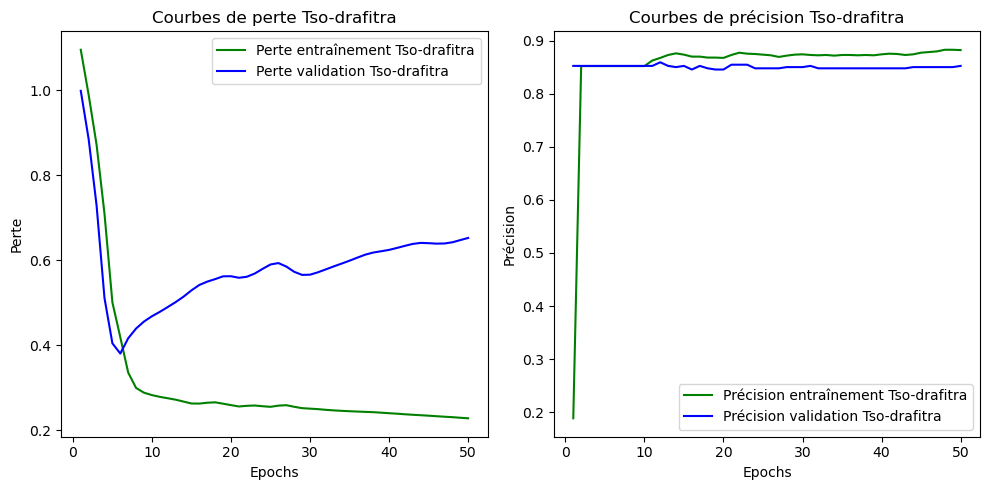

In [17]:
import matplotlib.pyplot as plt

# Extraire les valeurs de précision et de perte de l'entraînement et de la validation
td_train_loss = history_td.history['loss']
td_val_loss = history_td.history['val_loss']
td_train_accuracy = history_td.history['accuracy']
td_val_accuracy = history_td.history['val_accuracy']
td_epochs = range(1, len(td_train_loss) + 1)

# Tracer les courbes de perte
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(td_epochs, td_train_loss, 'g', label='Perte entraînement Tso-drafitra')
plt.plot(td_epochs, td_val_loss, 'b', label='Perte validation Tso-drafitra')
plt.title('Courbes de perte Tso-drafitra')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.legend()

# Tracer les courbes de précision
plt.subplot(1, 2, 2)
plt.plot(td_epochs, td_train_accuracy, 'g', label='Précision entraînement Tso-drafitra')
plt.plot(td_epochs, td_val_accuracy, 'b', label='Précision validation Tso-drafitra')
plt.title('Courbes de précision Tso-drafitra')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()


<h4>Mivadi-drafitra</h4>

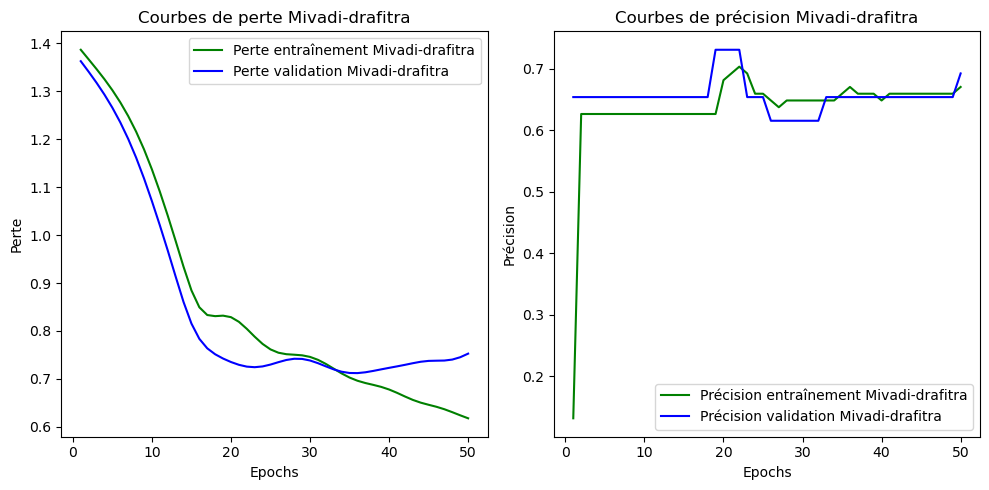

In [18]:
import matplotlib.pyplot as plt

# Extraire les valeurs de précision et de perte de l'entraînement et de la validation
md_train_loss = history_md.history['loss']
md_val_loss = history_md.history['val_loss']
md_train_accuracy = history_md.history['accuracy']
md_val_accuracy = history_md.history['val_accuracy']
md_epochs = range(1, len(md_train_loss) + 1)

# Tracer les courbes de perte
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(md_epochs, md_train_loss, 'g', label='Perte entraînement Mivadi-drafitra')
plt.plot(md_epochs, md_val_loss, 'b', label='Perte validation Mivadi-drafitra')
plt.title('Courbes de perte Mivadi-drafitra')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.legend()

# Tracer les courbes de précision
plt.subplot(1, 2, 2)
plt.plot(md_epochs, md_train_accuracy, 'g', label='Précision entraînement Mivadi-drafitra')
plt.plot(md_epochs, md_val_accuracy, 'b', label='Précision validation Mivadi-drafitra')
plt.title('Courbes de précision Mivadi-drafitra')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()


<h3>Évaluation du modèle</h3>

<h4>Tso-drafitra</h4>

In [19]:
# Évaluation du modèle sur les données de test
td_loss, td_accuracy = model_td.evaluate(X_td_test_padded, y_td_test_padded)
# Affichage des résultats
print(f"Perte (Loss) sur les données de test : {td_loss}")
print(f"Précision (Accuracy) sur les données de test : {td_accuracy}")
print(f"Test accuracy: {td_accuracy * 100:.2f}%")


1/1 [==============================] - 0s 90ms/step - loss: 0.6527 - accuracy: 0.8523
Perte (Loss) sur les données de test : 0.652681827545166
Précision (Accuracy) sur les données de test : 0.8522727489471436
Test accuracy: 85.23%


<h4>Mivadi-drafitra</h4>

In [20]:
# Évaluation du modèle sur les données de test
md_loss, md_accuracy = model_md.evaluate(X_md_test_padded, y_md_test_padded)
# Affichage des résultats
print(f"Perte (Loss) sur les données de test : {md_loss}")
print(f"Précision (Accuracy) sur les données de test : {md_accuracy}")
print(f"Test accuracy: {md_accuracy * 100:.2f}%")


1/1 [==============================] - 0s 80ms/step - loss: 0.7526 - accuracy: 0.6923
Perte (Loss) sur les données de test : 0.7526069283485413
Précision (Accuracy) sur les données de test : 0.692307710647583
Test accuracy: 69.23%


<h3>F1-score</h3>

<h4>Tso-drafitra</h4>

In [21]:
# Étape 9 : Autres métriques d'évaluation (F1-score, matrice de confusion, etc.)
# Vous pouvez également calculer d'autres métriques d'évaluation comme le F1-score, la matrice de confusion, etc.

from sklearn.metrics import f1_score, confusion_matrix

# Prédictions du modèle sur les données de test
predictions_td = model_td.predict(X_td_test_padded)
predicted_labels_td = np.argmax(predictions_td, axis=-1)

# Calcul du F1-score
f1_td = f1_score(y_td_test_padded.flatten(), predicted_labels_td.flatten(), average='weighted')
print(f"F1-score : {f1_td}")

# Calcul de la matrice de confusion
confusion_td = confusion_matrix(y_td_test_padded.flatten(), predicted_labels_td.flatten())
print("Matrice de confusion TD:")
print(confusion_td)


1/1 [==============================] - 2s 2s/step
F1-score : 0.8175928515282522
Matrice de confusion TD:
[[363  12   0]
 [ 11  12   0]
 [ 27  15   0]]


<h4>Mivadi-drafitra</h4>

In [22]:
# Étape 9 : Autres métriques d'évaluation (F1-score, matrice de confusion, etc.)
# Vous pouvez également calculer d'autres métriques d'évaluation comme le F1-score, la matrice de confusion, etc.

from sklearn.metrics import f1_score, confusion_matrix

# Prédictions du modèle sur les données de test
predictions_md = model_md.predict(X_md_test_padded)
predicted_labels_md = np.argmax(predictions_md, axis=-1)

# Calcul du F1-score
f1_md = f1_score(y_md_test_padded.flatten(), predicted_labels_md.flatten(), average='weighted')
print(f"F1-score : {f1_md}")

# Calcul de la matrice de confusion
confusion_md = confusion_matrix(y_md_test_padded.flatten(), predicted_labels_md.flatten())
print("Matrice de confusion TD:")
print(confusion_md)


1/1 [==============================] - 3s 3s/step
F1-score : 0.6576923076923076
Matrice de confusion TD:
[[15  0  0  2]
 [ 3  1  0  0]
 [ 0  0  0  2]
 [ 1  0  0  2]]


<h4>Tso-drafitra</h4>

In [23]:
from sklearn.metrics import f1_score

# Prédictions du modèle
predictions_td = model_td.predict(X_td_test_padded)
predicted_labels_td = np.argmax(predictions_td, axis=-1)

# Calcul du F1-score
f1_td = f1_score(y_td_test_padded.flatten(), predicted_labels_td.flatten(), average='weighted')
print(f"F1-score: {f1_td}")


1/1 [==============================] - 0s 180ms/step
F1-score: 0.8175928515282522


<h4>Mivadi-drafitra</h4>

In [24]:
from sklearn.metrics import f1_score

# Prédictions du modèle
predictions_md = model_md.predict(X_md_test_padded)
predicted_labels_md = np.argmax(predictions_md, axis=-1)

# Calcul du F1-score
f1_md = f1_score(y_md_test_padded.flatten(), predicted_labels_md.flatten(), average='weighted')
print(f"F1-score: {f1_md}")


1/1 [==============================] - 0s 103ms/step
F1-score: 0.6576923076923076


<h3>Prédictions sur de nouvelles phrases</h3>

In [25]:
# Prédiction sur de nouvelles phrases
nouvelles_phrases = [
    "Hitan'Andriamanitra fa tsara.",
    "Tsara izany."
    #"Tsara ny nanao izao tany izao."
    # Ajoutez autant de phrases que vous le souhaitez ici
]


<h4>Prediction Postag + Structure Phrase</h4>

In [26]:
#nouvelle_phrase = input("Entrer la phrase: ") 
#prediction postag + structure phrase
nouvelle_phrase = "Izy dia hitan'Andriamanitra fa tsara."

import joblib
model_pos = load_model('/home/vatosoa/mg-smart-lingua-discover/data/models/model-mg-postag.h5')
# Chargement des encodeurs
token_encoder_pos = joblib.load('/home/vatosoa/mg-smart-lingua-discover/data/pretraining/mg-postag/token_encoder.joblib')
label_encoder_pos = joblib.load('/home/vatosoa/mg-smart-lingua-discover/data/pretraining/mg-postag/label_encoder.joblib')  

def tokenize_words_pos(text):
    if isinstance(text, str):
        text = re.sub(r'[-;:()?!,.\'"\/|]', ' ', text)
        tokens = nltk.word_tokenize(text)
        tokens = [token.lower() for token in tokens if token.isalnum()]
        return tokens
    else:
        return []

tokens_pos = tokenize_words_pos(nouvelle_phrase)
predictions_tokens_pos = []

for i, token in enumerate(tokens_pos):
    token_encoded_pos = token_encoder_pos.transform([token])[0]
    token_padded_pos = pad_sequences([[token_encoded_pos]], maxlen=1, padding='post')
    prediction_token_pos = model_pos.predict(token_padded_pos)
    decoded_token_pos = label_encoder_pos.inverse_transform(np.argmax(prediction_token_pos, axis=-1))
    # condition pour "dia"
    if token.lower() == 'dia':
        if i == 0 or i >= 2:
            predictions_tokens_pos.append('Mpampitohy')
        else:
            predictions_tokens_pos.append('Kianteny')
    else:
        predictions_tokens_pos.append(decoded_token_pos[0]) 

    if "dia" in tokens_pos and "Kianteny" in predictions_tokens_pos:
        structure_prediction = "Mivadi-drafitra"
    else:
        structure_prediction = "Tso-drafitra"
            
print(f"Phrase : {nouvelle_phrase}")
print(f"Tokens de la phrase: {tokens_pos}")
print(f"Prédictions pour chaque token: {predictions_tokens_pos}")
print(f"Structure de la phrase: {structure_prediction} ")


1/1 [==============================] - 0s 33ms/step


/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 0s 34ms/step


/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 0s 37ms/step
Phrase : Izy dia hitan'Andriamanitra fa tsara.
Tokens de la phrase: ['izy', 'dia', 'hitan', 'andriamanitra', 'fa', 'tsara']
Prédictions pour chaque token: ['Mpisolo', 'Kianteny', 'Matoanteny', 'Anarana', 'Tambinteny', 'Mpamaritra']
Structure de la phrase: Mivadi-drafitra 


/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h4>Prediction VOS Structure</h4>

In [27]:
# Prédiction du modèle correspondant à la structure de la phrase
if structure_prediction == "Tso-drafitra":
    predictions_phrases_td = []
    tokens_phrase_td = tokenize_words_td(nouvelle_phrase)  # Tokeniser la nouvelle phrase
    predictions_tokens_td = []  # Initialiser les prédictions pour cette phrase
    for token_td in tokens_phrase_td:
        token_encoded_td = token_encoder_td.transform([token_td])[0]  # Encoder le token
        token_padded_td = pad_sequences([[token_encoded_td]], maxlen=1, padding='post')  # Rembourrer le token
        prediction_token_td = model_td.predict(token_padded_td)  # Prédire l'étiquette pour le token
        decoded_token_td = label_encoder_td.inverse_transform(np.argmax(prediction_token_td, axis=-1))
        predictions_tokens_td.append(decoded_token_td[0])  # Ajouter l'étiquette prédite aux prédictions de la phrase

    predictions_phrases_td.append(predictions_tokens_td)  # Ajouter les prédictions pour cette phrase

    print("Prédictions pour Tso-drafitra:")
    print(f"Tokens de la phrase: {tokens_phrase_td}")
    print(f"Prédictions pour chaque token: {predictions_tokens_td}")

else:
    predictions_phrases_md = []
    tokens_phrase_md = tokenize_words_md(nouvelle_phrase)  # Tokeniser la nouvelle phrase
    predictions_tokens_md = []  # Initialiser les prédictions pour cette phrase
    for token_md in tokens_phrase_md:
        token_encoded_md = token_encoder_md.transform([token_md])[0]  # Encoder le token
        token_padded_md = pad_sequences([[token_encoded_md]], maxlen=1, padding='post')  # Rembourrer le token
        prediction_token_md = model_md.predict(token_padded_md)  # Prédire l'étiquette pour le token
        decoded_token_md = label_encoder_md.inverse_transform(np.argmax(prediction_token_md, axis=-1))
        predictions_tokens_md.append(decoded_token_md[0])  # Ajouter l'étiquette prédite aux prédictions de la phrase

    predictions_phrases_md.append(predictions_tokens_md)  # Ajouter les prédictions pour cette phrase

    print("Prédictions pour Mivadi-drafitra:")
    print(f"Tokens de la phrase: {tokens_phrase_md}")
    print(f"Prédictions pour chaque token: {predictions_tokens_md}")

1/1 [==============================] - 0s 37ms/step


/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 [==============================] - 0s 52ms/step
Prédictions pour Mivadi-drafitra:
Tokens de la phrase: ['izy', 'dia', 'hitan', 'andriamanitra']
Prédictions pour chaque token: ['EM', 'EM', 'EM', 'EM']


/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vatosoa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
tokens = tokens_phrase_md
tokens[0] = tokens[0].capitalize()
phrase = " ".join(tokens) + "."
print(f"Phrase entrée originale: {nouvelle_phrase}")
print(f"Phrase: {phrase}")


Phrase entrée originale: Izy dia hitan'Andriamanitra fa tsara.
Phrase: Izy dia hitan andriamanitra.


In [29]:
import re

def tokenize_words_phrase(text):
    if isinstance(text, str):
        # Utiliser la fonction word_tokenize pour extraire les mots
        tokens = nltk.word_tokenize(text)

        # Tokeniser les caractères spéciaux
        tokens_with_special_chars = []
        for token in tokens:
            # Utiliser une expression régulière pour séparer les caractères spéciaux
            tokens_with_special_chars.extend(re.findall(r"[\w]+|[.,!?;']", token))

        return tokens_with_special_chars
    else:
        return []

tokens_original = tokenize_words_phrase(nouvelle_phrase)
print(tokens_original)
new_tokens = []
tokens_original = tokenize_words_phrase(nouvelle_phrase)

for token_md in tokens_phrase_md:
    found = False
    for token_original in tokens_original:
        if token_md == token_original.lower():
            # Trouver l'emplacement de l'apostrophe dans le token original
            apostrophe_index = token_original.find("'")

            # Si l'apostrophe est présente, l'ajouter à la position correspondante dans le nouveau token
            if apostrophe_index != -1:
                new_tokens[-1] = new_tokens[-1][:apostrophe_index] + "'" + new_tokens[-1][apostrophe_index:]
            else:
                new_tokens.append(token_original)
            found = True
            break

    if not found:
        new_tokens.append(token_md)

# Reproduire la phrase originale avec les caractères spéciaux entre les deux tokens existants parallèlement (des deux listes tokens) du tokens_phrase_md
result_phrase = ' '.join(new_tokens) + '.'
print(result_phrase)


['Izy', 'dia', 'hitan', "'", 'Andriamanitra', 'fa', 'tsara', '.']
Izy dia hitan Andriamanitra.


In [30]:
new_tokens = []
tokens_original = tokenize_words_phrase(nouvelle_phrase)

for token_md in tokens_phrase_md:
    found = False
    for token_original in tokens_original:
        if token_md == token_original.lower():
            # Trouver l'emplacement de l'apostrophe dans le token original
            apostrophe_index = token_original.find("'")

            # Si l'apostrophe est présente, l'ajouter à la position correspondante dans le nouveau token
            if apostrophe_index != -1:
                new_tokens[-1] = new_tokens[-1][:apostrophe_index] + "'" + new_tokens[-1][apostrophe_index:]
            else:
                new_tokens.append(token_original)
            found = True
            break

    if not found:
        new_tokens.append(token_md)

# Reproduire la phrase originale avec les caractères spéciaux entre les deux tokens existants parallèlement (des deux listes tokens) du tokens_phrase_md
result_phrase = ' '.join(new_tokens) + '.'
print(result_phrase)


Izy dia hitan Andriamanitra.


<h3>Evaluation</h3>

In [31]:
# Définition des données de test et des étiquettes réelles
nouvelles_phrases = ["Izy dia hitan'Andriamanitra fa tsara.", "Hitan'Andriamanitra fa tsara."]
etiquettes_reelles = [["L", "Kianteny","EM", "F"], ["EM", "L"]]  # Liste des étiquettes réelles pour chaque phrase

# Liste pour stocker les précisions de chaque phrase
accuracies = []

for i, phrase in enumerate(nouvelles_phrases):
    print(f"Phrase {i + 1}: {phrase}")

    # Obtenir les prédictions pour chaque token de la phrase
    if structure_prediction == "Tso-drafitra":
        tokens_phrase = tokenize_words_td(phrase)
        print(f"Tokens de la phrase: {tokens_phrase}")
        predictions_tokens = predictions_phrases_td[i] if i < len(predictions_phrases_td) else []
    else:
        tokens_phrase = tokenize_words_md(phrase)
        print(f"Tokens de la phrase: {tokens_phrase}")
        predictions_tokens = predictions_phrases_md[i] if i < len(predictions_phrases_md) else []

    print(f"Prédictions pour chaque token: {predictions_tokens}")

    # Vérifier si les étiquettes réelles sont disponibles pour cette phrase
    if i < len(etiquettes_reelles):
        etiquettes_reelles_phrase = etiquettes_reelles[i]
        print(f"Étiquettes réelles pour la phrase: {etiquettes_reelles_phrase}")

        # Comparer les prédictions avec les étiquettes réelles
        precision = sum(1 for a, b in zip(predictions_tokens, etiquettes_reelles_phrase) if a == b) / len(predictions_tokens) if predictions_tokens else 0
        print(f"Précision pour cette phrase: {precision * 100:.2f}%")
        accuracies.append(precision)

    print("\n")

# Calcul de la précision moyenne sur toutes les phrases
average_accuracy = sum(accuracies) / len(accuracies) if accuracies else 0
print(f"Précision moyenne sur l'ensemble des phrases : {average_accuracy * 100:.2f}%")

Phrase 1: Izy dia hitan'Andriamanitra fa tsara.
Tokens de la phrase: ['izy', 'dia', 'hitan', 'andriamanitra']
Prédictions pour chaque token: ['EM', 'EM', 'EM', 'EM']
Étiquettes réelles pour la phrase: ['L', 'Kianteny', 'EM', 'F']
Précision pour cette phrase: 25.00%


Phrase 2: Hitan'Andriamanitra fa tsara.
Tokens de la phrase: ['hitan', 'andriamanitra']
Prédictions pour chaque token: []
Étiquettes réelles pour la phrase: ['EM', 'L']
Précision pour cette phrase: 0.00%


Précision moyenne sur l'ensemble des phrases : 12.50%


In [32]:
# Comparaison des prédictions avec les étiquettes réelles pour chaque phrase
if structure_prediction == "Tso-drafitra":
    for i, (predictions, true_labels) in enumerate(zip(predictions_phrases_td, etiquettes_reelles)):
        for pred, label in zip(predictions, true_labels):
            if pred != label:
                print(f"Échantillon mal prédit - Prédiction : {pred}, Étiquette réelle : {label}")
else:
    for i, (predictions, true_labels) in enumerate(zip(predictions_phrases_md, etiquettes_reelles)):
        for pred, label in zip(predictions, true_labels):
            if pred != label:
                print(f"Échantillon mal prédit - Prédiction : {pred}, Étiquette réelle : {label}")


Échantillon mal prédit - Prédiction : EM, Étiquette réelle : L
Échantillon mal prédit - Prédiction : EM, Étiquette réelle : Kianteny
Échantillon mal prédit - Prédiction : EM, Étiquette réelle : F


In [40]:
from sklearn.metrics import confusion_matrix

# Comparaison des prédictions avec les étiquettes réelles pour chaque phrase
if structure_prediction == "Tso-drafitra":
    etiquettes_reelles_aplaties = [label for phrase_labels in etiquettes_reelles for label in phrase_labels]
    predictions_aplaties = [label for phrase_predictions in predictions_phrases_td for label in phrase_predictions]
else:
    etiquettes_reelles_aplaties = [label for phrase_labels in etiquettes_reelles for label in phrase_labels]
    predictions_aplaties = [label for phrase_predictions in predictions_phrases_md for label in phrase_predictions]

# Padding predictions_aplaties with 'O' labels if predictions are less than actual labels
max_length = max(len(etiquettes_reelles_aplaties), len(predictions_aplaties))
predictions_aplaties += ['O'] * (max_length - len(predictions_aplaties))

# Padding etiquettes_reelles_aplaties with 'O' labels if actual labels are less than predictions
etiquettes_reelles_aplaties += ['O'] * (max_length - len(etiquettes_reelles_aplaties))

# Calculate the confusion matrix
matrice_confusion = confusion_matrix(etiquettes_reelles_aplaties, predictions_aplaties)
print("Matrice de confusion :")
print(matrice_confusion)


Matrice de confusion :
[[1 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 1]
 [0 0 0 0 0]]


In [42]:
# Calculate precision, recall, and F1-score for each class
if structure_prediction == "Tso-drafitra":
    VP = np.diag(matrice_confusion)
    FP = np.sum(matrice_confusion, axis=0) - VP
    FN = np.sum(matrice_confusion, axis=1) - VP
    precision = VP / (VP + FP)
    rappel = VP / (VP + FN)
    f_mesure = 2 * (precision * rappel) / (precision + rappel)
else:
    VP = np.diag(matrice_confusion)
    FP = np.sum(matrice_confusion, axis=0) - VP
    FN = np.sum(matrice_confusion, axis=1) - VP
    precision = VP / (VP + FP)
    rappel = VP / (VP + FN)
    f_mesure = 2 * (precision * rappel) / (precision + rappel)

# Display results for each class
for i in range(len(precision)):
    print(f"Classe {i + 1}:")
    print(f"Précision: {precision[i]:.4f}")
    print(f"Rappel: {rappel[i]:.4f}")
    print(f"F-mesure: {f_mesure[i]:.4f}")
    print()


Classe 1:
Précision: 0.2500
Rappel: 0.5000
F-mesure: 0.3333

Classe 2:
Précision: nan
Rappel: 0.0000
F-mesure: nan

Classe 3:
Précision: nan
Rappel: 0.0000
F-mesure: nan

Classe 4:
Précision: nan
Rappel: 0.0000
F-mesure: nan

Classe 5:
Précision: 0.0000
Rappel: nan
F-mesure: nan



/tmp/ipykernel_20963/1361511807.py:13: RuntimeWarning: invalid value encountered in divide
  precision = VP / (VP + FP)
/tmp/ipykernel_20963/1361511807.py:14: RuntimeWarning: invalid value encountered in divide
  rappel = VP / (VP + FN)


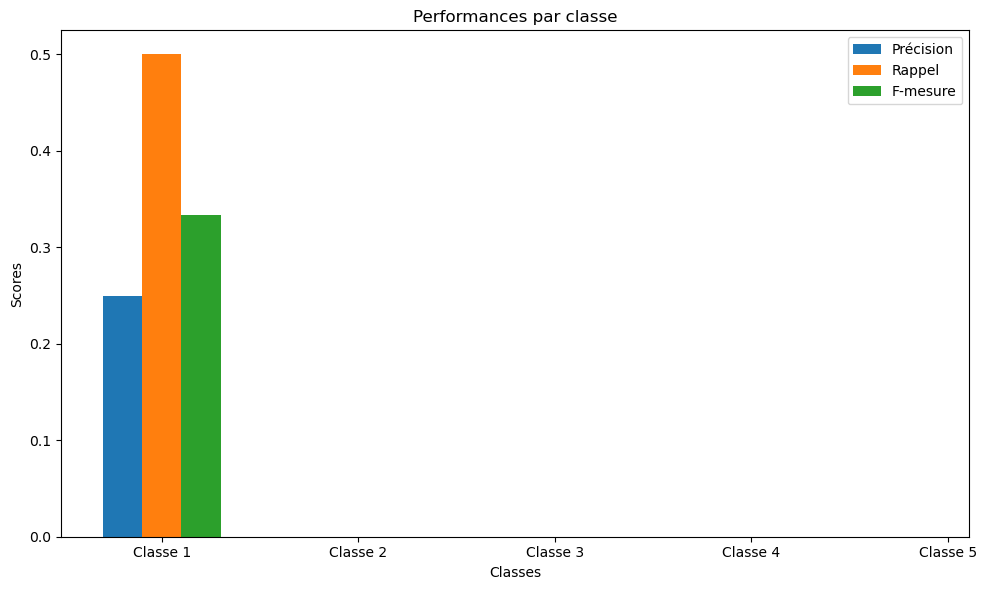

In [43]:
import matplotlib.pyplot as plt

# Supposons que vous avez calculé les métriques pour chaque classe (precision, recall, f_mesure)
# Assurez-vous que precision, recall et f_mesure sont des tableaux ou des listes contenant les valeurs pour chaque classe

classes = range(len(precision))  # Liste des classes (0, 1, 2, ...)
labels = ['Classe ' + str(i + 1) for i in classes]  # Labels pour les classes

# Visualisation de la précision, du rappel et de la F-mesure pour chaque classe
plt.figure(figsize=(10, 6))

plt.bar(classes, precision, width=0.2, align='center', label='Précision')
plt.bar([c + 0.2 for c in classes], rappel, width=0.2, align='center', label='Rappel')
plt.bar([c + 0.4 for c in classes], f_mesure, width=0.2, align='center', label='F-mesure')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Performances par classe')
plt.xticks([c + 0.2 for c in classes], labels)
plt.legend()
plt.tight_layout()

plt.show()


In [44]:
from collections import Counter

###################################################################
#####################TSO-DRAFITRA#################################
##################################################################
# Retrieve the indices where Sokajinteny contains "Mpanoritra"
print("...................TSO-DRAFITRA..........................")

indices_em = df_td[df_td['Firafitra'].apply(lambda x: 'EM' in x)].index

# Create a dictionary to store the tokens of Fehezanteny associated with "EM" in Sokajinteny
tokens_fehezanteny_em = {}

# Create a counter for the occurrence of each "EM" in a sentence
occurrences_em = Counter()

# Iterate over the indices to retrieve the corresponding tokens in Fehezanteny
for index in indices_em:
    firafitra_tokens = df_td.at[index, 'Firafitra_tokens']
    fehezanteny_tokens = df_td.at[index, 'Fehezanteny_tokens']
    
    # Check if "EM" is present in Firafitra_tokens
    if 'EM' in firafitra_tokens:
        # Retrieve the index of "Mpanoritra" in Firafitra_tokens
        index_em = firafitra_tokens.index('EM')
        
        # Check if the index is within the range of Fehezanteny tokens
        if index_em < len(fehezanteny_tokens):
            # Add the specific token of Fehezanteny associated with "EM" to the dictionary
            token_associated_em = fehezanteny_tokens[index_em]
            tokens_fehezanteny_em[index] = token_associated_em

            # Calculate the occurrence of "EM" in the sentence and add it to the counter
            occurrences_em[token_associated_em] += 1
            
# Display the specific Fehezanteny tokens associated with "EM" in Sokajinteny
for index, token_fehezanteny_em in tokens_fehezanteny_em.items():
    print(f"Token Fehezanteny associé à 'EM' (index {index}): {token_fehezanteny_em}")

# Display the occurrence of each "Mpanoritra" in a sentence
print("...................TSO-DRAFITRA..........................")
print("\nOccurrence de chaque 'EM' dans le corpus td:")
for token, count in occurrences_em.items():
    print(f"{token}: {count}")




###################################################################
#####################MIVADI-DRAFITRA#################################
##################################################################
print("...................MIVADI-DRAFITRA..........................")

indices_em = df_md[df_md['Firafitra'].apply(lambda x: 'EM' in x)].index

# Create a dictionary to store the tokens of Fehezanteny associated with "EM" in Sokajinteny
tokens_fehezanteny_em = {}

# Create a counter for the occurrence of each "EM" in a sentence
occurrences_em = Counter()

# Iterate over the indices to retrieve the corresponding tokens in Fehezanteny
for index in indices_em:
    firafitra_tokens = df_md.at[index, 'Firafitra_tokens']
    fehezanteny_tokens = df_md.at[index, 'Fehezanteny_tokens']
    
    # Check if "EM" is present in Firafitra_tokens
    if 'EM' in firafitra_tokens:
        # Retrieve the index of "Mpanoritra" in Firafitra_tokens
        index_em = firafitra_tokens.index('EM')
        
        # Check if the index is within the range of Fehezanteny tokens
        if index_em < len(fehezanteny_tokens):
            # Add the specific token of Fehezanteny associated with "EM" to the dictionary
            token_associated_em = fehezanteny_tokens[index_em]
            tokens_fehezanteny_em[index] = token_associated_em

            # Calculate the occurrence of "EM" in the sentence and add it to the counter
            occurrences_em[token_associated_em] += 1
            
# Display the specific Fehezanteny tokens associated with "EM" in Sokajinteny
for index, token_fehezanteny_em in tokens_fehezanteny_em.items():
    print(f"Token Fehezanteny associé à 'EM' (index {index}): {token_fehezanteny_em}")

# Display the occurrence of each "Mpanoritra" in a sentence
print("...................MIVADI-DRAFITRA..........................")
print("\nOccurrence de chaque 'EM' dans le corpus Md:")
for token, count in occurrences_em.items():
    print(f"{token}: {count}")



...................TSO-DRAFITRA..........................
Token Fehezanteny associé à 'EM' (index 0): nahary
Token Fehezanteny associé à 'EM' (index 1): nanomba
Token Fehezanteny associé à 'EM' (index 2): nanao
Token Fehezanteny associé à 'EM' (index 3): hitan
Token Fehezanteny associé à 'EM' (index 4): nanao
Token Fehezanteny associé à 'EM' (index 5): nisy
Token Fehezanteny associé à 'EM' (index 6): nanao
Token Fehezanteny associé à 'EM' (index 7): nanao
Token Fehezanteny associé à 'EM' (index 8): nanao
Token Fehezanteny associé à 'EM' (index 9): nisy
Token Fehezanteny associé à 'EM' (index 10): nanao
Token Fehezanteny associé à 'EM' (index 11): nanao
Token Fehezanteny associé à 'EM' (index 12): hitan
Token Fehezanteny associé à 'EM' (index 13): nanao
Token Fehezanteny associé à 'EM' (index 14): naniry
Token Fehezanteny associé à 'EM' (index 15): nisy
Token Fehezanteny associé à 'EM' (index 16): nanao
Token Fehezanteny associé à 'EM' (index 17): fanazavana
Token Fehezanteny associé à 

<h3>Enregistrement du modèle et encoder</h3>

In [45]:
# Sauvegarde de model, model-mg-structurevos.h5 est le modèle Keras
model_td.save('/home/vatosoa/mg-smart-lingua-discover/data/models/model-mg-structurevos-td.h5')
model_md.save('/home/vatosoa/mg-smart-lingua-discover/data/models/model-mg-structurevos-md.h5')

# Sauvegarde de la fonction de tokenization
joblib.dump(tokenize_words_td, '/home/vatosoa/mg-smart-lingua-discover/data/pretraining/mg-structurevos/tokenization-td.joblib')
joblib.dump(tokenize_words_md, '/home/vatosoa/mg-smart-lingua-discover/data/pretraining/mg-structurevos/tokenization-md.joblib')

# Sauvegarde des encodeurs
joblib.dump(token_encoder_td, '/home/vatosoa/mg-smart-lingua-discover/data/pretraining/mg-structurevos/token_encoder-td.joblib')
joblib.dump(token_encoder_md, '/home/vatosoa/mg-smart-lingua-discover/data/pretraining/mg-structurevos/token_encoder-md.joblib')
joblib.dump(label_encoder_td, '/home/vatosoa/mg-smart-lingua-discover/data/pretraining/mg-structurevos/label_encoder-td.joblib')
joblib.dump(label_encoder_md, '/home/vatosoa/mg-smart-lingua-discover/data/pretraining/mg-structurevos/label_encoder-md.joblib')


/home/vatosoa/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['/home/vatosoa/mg-smart-lingua-discover/data/pretraining/mg-structurevos/label_encoder-md.joblib']

In [46]:
end = time.time()
print(f"Total time required for all this = {end-start}")

Total time required for all this = 1134.2021749019623


In [47]:
print(start)
print(end)

1709390578.4491456
1709391712.6513205
